<a href="https://colab.research.google.com/github/vrishi220/MachineLearning/blob/master/MLhw1prob5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.

Actual Epoch: 1
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:101: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


 - 1s - loss: 0.6587 - acc: 0.8422 - val_loss: 0.4300 - val_acc: 0.8870

Actual Epoch: 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.3845 - acc: 0.8994 - val_loss: 0.3735 - val_acc: 0.8986

Actual Epoch: 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.3368 - acc: 0.9101 - val_loss: 0.3509 - val_acc: 0.9011

Actual Epoch: 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.3106 - acc: 0.9165 - val_loss: 0.3378 - val_acc: 0.9051

Actual Epoch: 5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.2926 - acc: 0.9217 - val_loss: 0.3330 - val_acc: 0.9061

Actual Epoch: 6
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.2793 - acc: 0.9254 - val_loss: 0.3279 - val_acc: 0.9083

Actual Epoch: 7
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.2687 - acc: 0.9286 - val_loss: 0.3266 - val_acc: 0.9071

Actual Epoch: 8
Train on 60000 sa

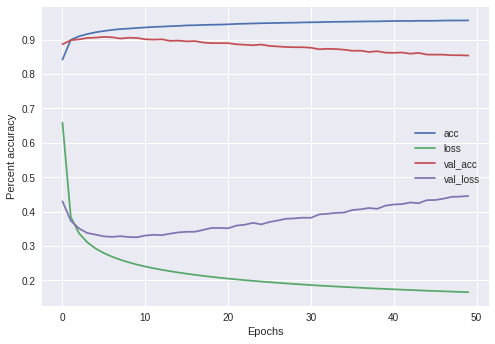

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

rate, batch_size, classes_size, epochs, input_size, final  = 0.05, 100, 10, 50, 28**2, []

# batch_size = 128
# num_classes = 10
# epochs = 30

# Reshape the training and testing data of a single dimension by 28*28. 
# Then the values of the reshaped vector are taken as float32 values for the ease of readability.
# Then the values are divided by 255 (max count for colors) so as to make all values withiin 0 to 1.
def reshapeAndReduce(X): return X.reshape(X.shape[0],X.shape[1]*X.shape[2]).astype('float32')/255

# Convert vector into an Numpy array of one-hot-encodings which are float values
def getOneHot(X,classes_size):
  one_hot_vec = []
  for i in X: one_hot_vec.append([1 if x == i else 0 for x in range(classes_size)])
  return np.array(one_hot_vec).astype('float32')

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Intial variable dictionary which holds all relavent variables.
var_dict = {'con':[[],[]],
            'x_width':[[],[]],
            'x_height':[[],[]],
            'x_bw':[[[],[]],[[],[]]],
            'x_row':[np.sum(x_train, axis = 1, keepdims = True),np.sum(x_test, axis = 1, keepdims = True)],
            'x_col':[np.sum(x_train, axis = 2, keepdims = True),np.sum(x_test, axis = 2, keepdims = True)]}

a = 0
# Get individual features based on height, width, black pixels, and white pizels.
for each in ((x_train, y_train),(x_test, y_test)):
  for i in range(each[1].shape[0]):
    
    c1,c2,c3 = 0,0,0
    
    if each[1][i] == 8: var_dict['con'][a].append(1)
    elif each[1][i] in [0,6,9]: var_dict['con'][a].append(2/3)
    else: var_dict['con'][a].append(1/3)
      
    for j in range(28):
      if var_dict['x_row'][a][i][0][j] > 0: c1 += 1
      if var_dict['x_col'][a][i][j][0] > 0: c2 += 1
      for k in range(28):
        if each[0][i][j][k] == 0: c3 += 1
          
    var_dict['x_width'][a].append(c1/28)
    var_dict['x_height'][a].append(c2/28)
    var_dict['x_bw'][a][0].append(c3/784)
    var_dict['x_bw'][a][1].append(1-(c3/784))
    
  a+=1 
      
# Reshape the training and test data.
X_train, X_test = reshapeAndReduce(x_train), reshapeAndReduce(x_test)


# concatenating x-training and x-testing features
train_test = [np.zeros((X_train.shape[0],X_train.shape[1]+5)), np.zeros((X_test.shape[0],X_test.shape[1]+5))]

for a,each in enumerate((X_train,X_test)):
  for i in range(each.shape[0]):
    for j in range(each.shape[1]):
      train_test[a][i][j] = each[i][j]
    train_test[a][i][784] = var_dict['con'][0][i]
    train_test[a][i][785] = var_dict['x_width'][0][i]
    train_test[a][i][786] = var_dict['x_height'][0][i]
    train_test[a][i][787] = var_dict['x_bw'][0][0][i]
    train_test[a][i][788] = var_dict['x_bw'][0][1][i]

# Convert class vector to binary class matrix (one-hot-encoding).
Y_train, Y_test = getOneHot(y_train, classes_size), getOneHot(y_test, classes_size)

# Initialize a sequential model
model = Sequential()

#Add two dense layers, one with 100 neurons and another with 10 for output. 
#The first utilizes the relu activstion function and the other utilizes softmax activation function
model.add(Dense(units = 10, activation = 'softmax'))

# Compile loss with Categorical Cross Entropy and utiize the Stochastic Gradient Descent with a learning rate of 0.05. 
# We pull metrics for Accuracy 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(lr=rate),metrics=['accuracy'])

# Initialize a dictionary which contains an array for the 4 main metrics
fit_history = {'acc':[],'loss':[]}

# Iterate through each epoch
for i in range(epochs):

  # Show current epoch
  print('\nActual Epoch: {}'.format(i+1))

  # For each epoch train the model against X_train and Y_train and a given test data of X_test and Y_test
  hist = model.fit(train_test[0], Y_train, batch_size = batch_size, nb_epoch = 1, verbose = 2, validation_data = (train_test[1], Y_test))

  # Push the 4 main updated metrics for each run to the fit history dictionaries. This will be used for building a metric plot.
  for each in fit_history: fit_history[each].append(hist.history[each])

# hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Print out the final metrics once the model is evaluated against the test data
for i in range(2): print('\nFinal {} of test data: {}%'.format('Loss'if i==0 else 'Accuracy',model.evaluate(train_test[1], Y_test, verbose = 0)[i]*100))

# Plot the training metrics
for each in fit_history: k = plt.plot(fit_history[each], label=each)

# Show Plot with legend
plt.xlabel('Epochs'); plt.ylabel('Percent accuracy'); plt.legend()
